In [164]:
import numpy as np
import pandas as pd

import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import datetime

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [165]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
data = pd.read_csv("data.csv")
data['datetime'] = pd.to_datetime(data['datetime'])
data.sort_values(by='datetime', inplace=True)
data.set_index('datetime', inplace=True)

return_period = 12

Y = np.log(data['close_cac']).diff(return_period).shift(-return_period)

X1 = np.log(data['Close_x']).diff(return_period)
X2 = np.log(data['Close_y']).diff(return_period)
X3 = np.log(data['SMA_cac']).diff(return_period)
X4 = np.log(data['EMA_cac']).diff(return_period)
X5 = np.log(data['WMA_cac']).diff(return_period)
X6 = np.log(data['TRIMA_cac']).diff(return_period)
X7 = np.log(data['DEMA_cac']).diff(return_period)
X13 = np.log(data['SMA_USATECH']).diff(return_period)
X14 = np.log(data['EMA_USATECH']).diff(return_period)
X15 = np.log(data['WMA_USATECH']).diff(return_period)
X16 = np.log(data['TRIMA_USATECH']).diff(return_period)
X17 = np.log(data['DEMA_USATECH']).diff(return_period)
X23 = np.log(data['SMA_USA500']).diff(return_period)
X24 = np.log(data['EMA_USA500']).diff(return_period)
X25 = np.log(data['WMA_USA500']).diff(return_period)
X26 = np.log(data['TRIMA_USA500']).diff(return_period)
X27 = np.log(data['DEMA_USA500']).diff(return_period)

X10 = pd.concat([np.log(data['close_cac']).diff(i) for i in [return_period, return_period*(102/return_period), return_period*(102*5/return_period), return_period*(102*5*4/return_period)]], axis=1).dropna()
X10.columns = ['CAC_5m', 'CAC_D', 'CAC_H', 'CAC_M']

X = pd.concat([X1, X2, X3, X4,X5,X6,X7,X10,X13,X14,X15,X16,X17,X23,X24,X25,X26,X27], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [167]:
dataset.head()

,close_cac,Close_x,Close_y,SMA_cac,EMA_cac,WMA_cac,TRIMA_cac,DEMA_cac,CAC_5m,CAC_D,...,SMA_USATECH,EMA_USATECH,WMA_USATECH,TRIMA_USATECH,DEMA_USATECH,SMA_USA500,EMA_USA500,WMA_USA500,TRIMA_USA500,DEMA_USA500
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-09 11:00:00,-0.003301,-0.000108,0.000009,0.0,0.001463,0.0,0.001033,0.001153,-0.002586,-0.003056,...,-0.000090,-0.000102,-0.000136,-0.000090,-0.000299,-0.000035,-0.000040,-0.000046,-0.000035,-0.000144
2015-01-09 12:00:00,0.000000,-0.001107,-0.000469,0.0,0.000267,0.0,-0.001009,-0.003493,-0.003301,-0.006357,...,-0.000146,-0.000127,-0.000155,-0.000146,-0.000312,-0.000123,-0.000151,-0.000154,-0.000123,-0.000341
2015-01-09 13:00:00,-0.001655,-0.000249,-0.000246,0.0,-0.000404,0.0,-0.001245,-0.003729,0.000000,-0.006357,...,-0.000206,-0.000280,-0.000312,-0.000206,-0.000556,-0.000217,-0.000335,-0.000356,-0.000217,-0.000640
2015-01-09 14:00:00,0.005897,0.003632,0.003776,0.0,-0.000334,0.0,-0.000771,-0.002114,-0.001655,-0.008011,...,0.000116,0.000301,0.000261,0.000116,0.000622,0.000078,0.000235,0.000198,0.000078,0.000523
2015-01-09 15:00:00,-0.011591,-0.004114,-0.002599,0.0,0.000170,0.0,-0.000202,-0.000138,0.005897,-0.002114,...,0.000174,0.000392,0.000423,0.000174,0.000684,0.000093,0.000219,0.000246,0.000093,0.000381


### Splitting data

In [168]:
test_size = 0.2

train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [169]:
seq_len = 2 # Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [170]:
X_train_LSTM.shape

(43645, 2, 21)

In [171]:
# 1 LSTM layer avec 50 sorties et 1 Dense layer avec 1 sortie
model1 = Sequential()
model1.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
model1.add(Dense(1))

# 1 LSTM layer avec 1 sortie
model2 = Sequential()
model2.add(LSTM(1, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))

# 1 LSTM layer avec 50 sorties, 1 Dense layer avec 10 sorties, et 1 Dense layer avec 1 sortie
model3 = Sequential()
model3.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
model3.add(Dense(10))
model3.add(Dense(1))

In [172]:
models = [ model1,model2,model3]
modN = [ 'model1','model2','model3']

for model in models:
  model.summary()
  print('\n')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50)                14400     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14451 (56.45 KB)
Trainable params: 14451 (56.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 1)                 92        
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
______________________

In [173]:
LossF = "mse"
opti = "adam"

for model in models:
  model.compile(loss=LossF, optimizer=opti)

In [174]:
history1 = model1.fit(X_train_LSTM, Y_train_LSTM, epochs=20, validation_data=(X_test_LSTM, Y_test_LSTM))
history2 = model2.fit(X_train_LSTM, Y_train_LSTM, epochs=20, validation_data=(X_test_LSTM, Y_test_LSTM))
history3 = model3.fit(X_train_LSTM, Y_train_LSTM, epochs=20, validation_data=(X_test_LSTM, Y_test_LSTM))

Epoch 1/20
1364/1364 [==============================] - 25s 12ms/step - loss: 3.5838e-06 - val_loss: 9.9640e-06
Epoch 2/20
1364/1364 [==============================] - 13s 9ms/step - loss: 3.4634e-06 - val_loss: 9.7598e-06
Epoch 3/20
1364/1364 [==============================] - 5s 4ms/step - loss: 3.4019e-06 - val_loss: 9.6516e-06
Epoch 4/20
1364/1364 [==============================] - 7s 5ms/step - loss: 3.3886e-06 - val_loss: 1.2764e-05
Epoch 5/20
1364/1364 [==============================] - 5s 4ms/step - loss: 3.3861e-06 - val_loss: 1.0097e-05
Epoch 6/20
1364/1364 [==============================] - 6s 5ms/step - loss: 3.3918e-06 - val_loss: 9.5937e-06
Epoch 7/20
1364/1364 [==============================] - 9s 7ms/step - loss: 3.3860e-06 - val_loss: 9.7017e-06
Epoch 8/20
1364/1364 [==============================] - 5s 4ms/step - loss: 3.3539e-06 - val_loss: 9.9776e-06
Epoch 9/20
1364/1364 [==============================] - 7s 5ms/step - loss: 3.3687e-06 - val_loss: 9.6974e-06
Epoch 1

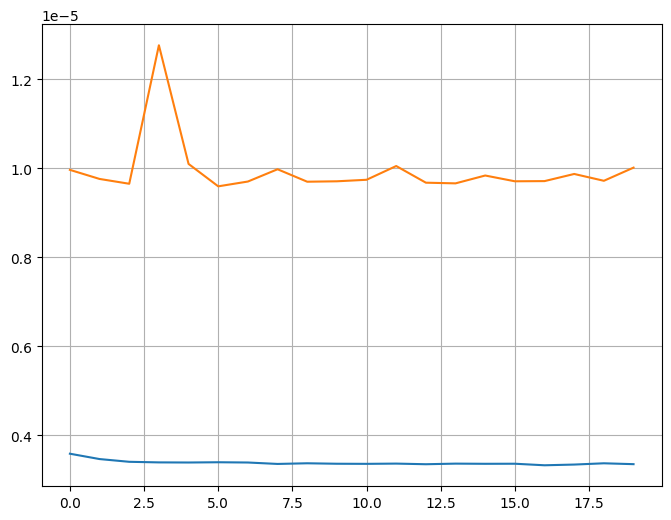

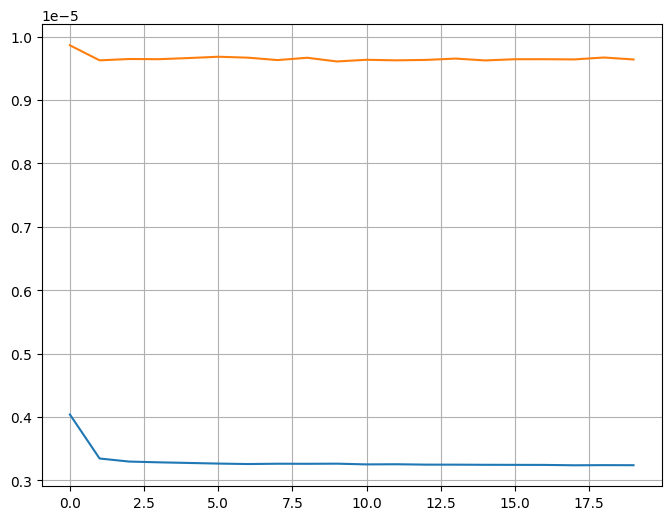

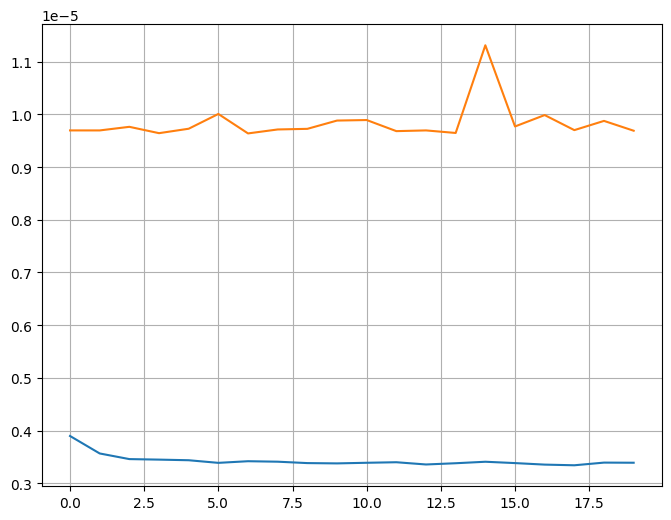

In [186]:
hist = [history1,history2,history3]

for h in hist:
  plt.plot(pd.DataFrame(h.history))
  plt.grid(True)
  plt.gca()
  plt.show()

In [187]:
for i in range(len(hist)):
  print('derniere perte du '+modN[i]+': ', round(hist[i].history['val_loss'][-1], 7))

derniere perte du model1:  1e-05
derniere perte du model2:  9.6e-06
derniere perte du model3:  9.7e-06


In [188]:
l =[]
for h in hist:
  l.append(round(h.history['val_loss'][-1],7))


meilleur_modelN = modN[l.index(min(l))]
meilleur_model = models[l.index(min(l))]

print(meilleur_modelN)

model2


In [189]:
predicted = meilleur_model.predict(X_test_LSTM)
print(mean_squared_error(Y_test,predicted))

341/341 [==============================] - 6s 18ms/step
9.638382490519414e-06


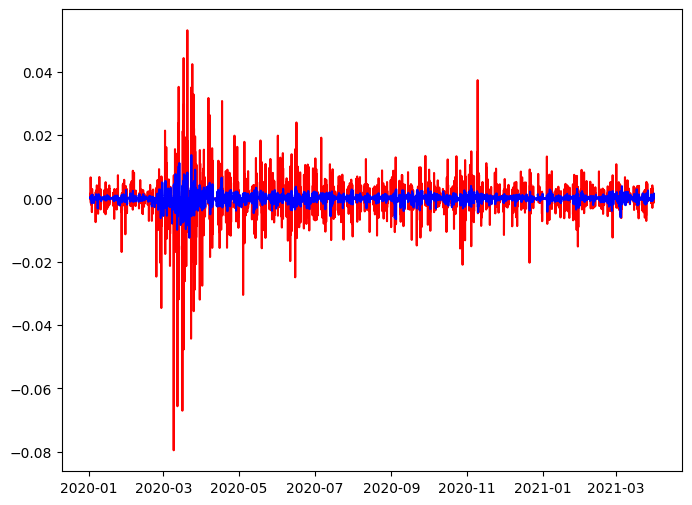

In [190]:
predicted = pd.DataFrame(predicted)
predicted.index = Y_test.index
plt.plot(Y_test, 'r')
plt.plot(predicted, 'b')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

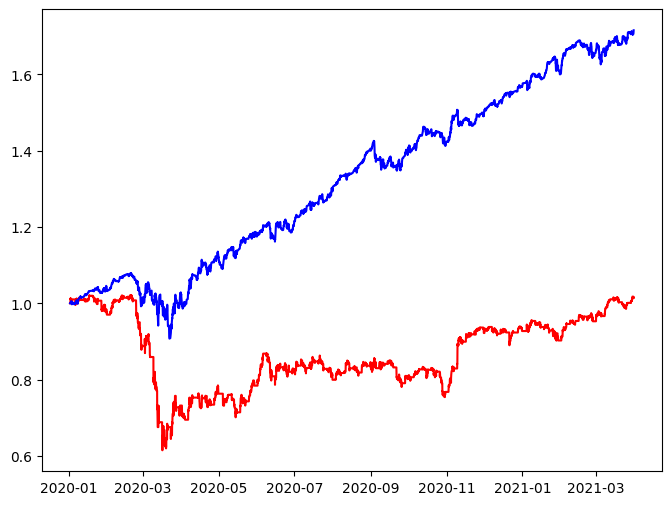

In [191]:
predicted = pd.DataFrame(predicted)
predicted.index = Y_test.index
plt.plot(np.exp(Y_test).cumprod(), 'r')
plt.plot(np.exp(predicted).cumprod(), 'b')
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [192]:
price = data['close_cac'][predicted.index[0]:predicted.index[-1]:return_period]

len(price)==len(predicted)

True

In [194]:
fee = 0.01

predicted_variation = []
for i in predicted[0]:
    predicted_variation.append(i)

PRICE = []
for i in price:
    PRICE.append(i)

balance = 0
in_position = False

# Define a function to calculate the expected return for a given action (buy/sell)
def expected_return(action, current_price, fee):
    if action == 'buy':
        return -current_price + (1 - fee) * current_price
    elif action == 'sell':
        return current_price - (1 + fee) * current_price

# Optimal stopping algorithm with lookahead
for i in range(len(predicted_variation) - 10):
    lookahead_predictions = predicted_variation[i+1:i+11]
    max_expected_return = float('-inf')
    best_action = None

    for prediction in lookahead_predictions:
        if prediction > 0 and not in_position:
            expected_ret = expected_return('buy', PRICE[i], fee)
            if expected_ret > max_expected_return:
                max_expected_return = expected_ret
                best_action = 'buy'
        elif prediction < 0 and in_position:
            expected_ret = expected_return('sell', PRICE[i], fee)
            if expected_ret > max_expected_return:
                max_expected_return = expected_ret
                best_action = 'sell'

    if best_action == 'buy':
        print("------")
        print('TURN', i, 'buy @', PRICE[i], 'cuz next var is', lookahead_predictions[0])
        print("------")
        balance -= PRICE[i] - fee * PRICE[i]
        in_position = True
    elif best_action == 'sell':
        print("------")
        print('TURN', i, 'sell @', PRICE[i], 'cuz next var is', lookahead_predictions[0])
        print("------")
        balance += PRICE[i] - fee * PRICE[i]
        in_position = False

# Sell at the end if still in position
if in_position:
    balance += PRICE[-1] - fee * PRICE[-1]

print("Final balance after backtesting:", balance)


Streaming output truncated to the last 5000 lines.
------
------
TURN 8711 buy @ 5611.0 cuz next var is -0.00027276802575215697
------
------
TURN 8713 sell @ 5611.0 cuz next var is 0.0005257155280560255
------
------
TURN 8714 buy @ 5611.0 cuz next var is 0.0003574452712200582
------
------
TURN 8715 sell @ 5611.0 cuz next var is 0.0005101856077089906
------
------
TURN 8716 buy @ 5611.0 cuz next var is 0.00039689274854026735
------
------
TURN 8717 sell @ 5611.0 cuz next var is 0.00019010415417142212
------
------
TURN 8718 buy @ 5611.0 cuz next var is 0.00020056650100741535
------
------
TURN 8719 sell @ 5611.0 cuz next var is 0.00014706912043038756
------
------
TURN 8720 buy @ 5606.0 cuz next var is 9.333974594483152e-05
------
------
TURN 8721 sell @ 5612.0 cuz next var is 7.793020631652325e-05
------
------
TURN 8722 buy @ 5617.0 cuz next var is -3.345165623613866e-06
------
------
TURN 8723 sell @ 5617.0 cuz next var is -0.00011719907342921942
------
------
TURN 8724 buy @ 5611

In [195]:
fee = 0.01

predicted_variation = []
for i in Y_test:
    predicted_variation.append(i)

PRICE = []
for i in price:
    PRICE.append(i)

balance = 0
in_position = False

def expected_return(action, current_price, fee):
    if action == 'buy':
        return -current_price + (1 - fee) * current_price
    elif action == 'sell':
        return current_price - (1 + fee) * current_price

for i in range(len(predicted_variation) - 10):
    lookahead_predictions = predicted_variation[i+1:i+11]
    max_expected_return = float('-inf')
    best_action = None

    for prediction in lookahead_predictions:
        if prediction > 0 and not in_position:
            expected_ret = expected_return('buy', PRICE[i], fee)
            if expected_ret > max_expected_return:
                max_expected_return = expected_ret
                best_action = 'buy'
        elif prediction < 0 and in_position:
            expected_ret = expected_return('sell', PRICE[i], fee)
            if expected_ret > max_expected_return:
                max_expected_return = expected_ret
                best_action = 'sell'

    if best_action == 'buy':
        balance -= PRICE[i] - fee * PRICE[i]
        in_position = True
    elif best_action == 'sell':
        balance += PRICE[i] - fee * PRICE[i]
        in_position = False


if in_position:
    balance += PRICE[-1] - fee * PRICE[-1]

print("Final balance after backtesting:", balance)


Final balance after backtesting: 6681.5099999999975


In [196]:
balance = PRICE[-1]-PRICE[0]

print(balance)

87.0
